# Week 5 ex 4
## Solution of coupled Scalar Field and Hubble equations

The necessary equations read

$H^2=\frac{8\pi G}{3}\rho=\frac{8\pi G}{3}(\frac{1}{2}\dot\phi^2+\frac{1}{2}m^2\phi^2)$

$\ddot\phi+3H\dot\phi+V'=0$

$\epsilon=-\frac{\dot{H}}{H^2}$


See Carroll or Baumann. The field equation comes from the least action principle.

## In Cosmic Time

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import simpson
import matplotlib.pyplot as plt

define functions for H and field equation

In [11]:
G=1.0

def V(phi):
    return 0.5*M**2*(phi**2)

def H(phi, dphi_dt):
  return np.sqrt( 8*np.pi/3*G*(V(phi) + 0.5*dphi_dt**2))

def f(t, y):
  return np.array([ y[1],  - (M**2)*y[0] - 3*H(y[0], y[1])*y[1] ])

## I computed V' analytically
##f returns a 2d array: the fist derivative in [0], the second derivative in [1]

def eps(H):
    dH_dt=np.diff(H,1,append=H[H.size-1])
    return -dH_dt/H**2

def eta(phi_dot,phi_dotdot,H):
    return -phi_dotdot/(H*phi_dot)



In [21]:
# initial conditions
M=5
phi0 =  25
dphi0_dt = -0.01

y0 = np.array([phi0, dphi0_dt])
start_time = 0.
stop_time = 60
Nsteps=2*stop_time

##indep variable
time = np.linspace(start_time, stop_time, Nsteps)
# numerical integrator
sol = solve_ivp(f, [start_time, stop_time], y0, method='RK45', t_eval=time)
phi=sol.y[0,:]
dphi_dt=sol.y[1,:]
d2phi_dt2=f(sol.t,np.array([phi,dphi_dt]))[1]

Epsilon=eps(H(phi,dphi_dt))
Eta=eta(dphi_dt,d2phi_dt2,H(phi,dphi_dt))

Text(0.5, 0, 't')

<Figure size 400x1000 with 0 Axes>

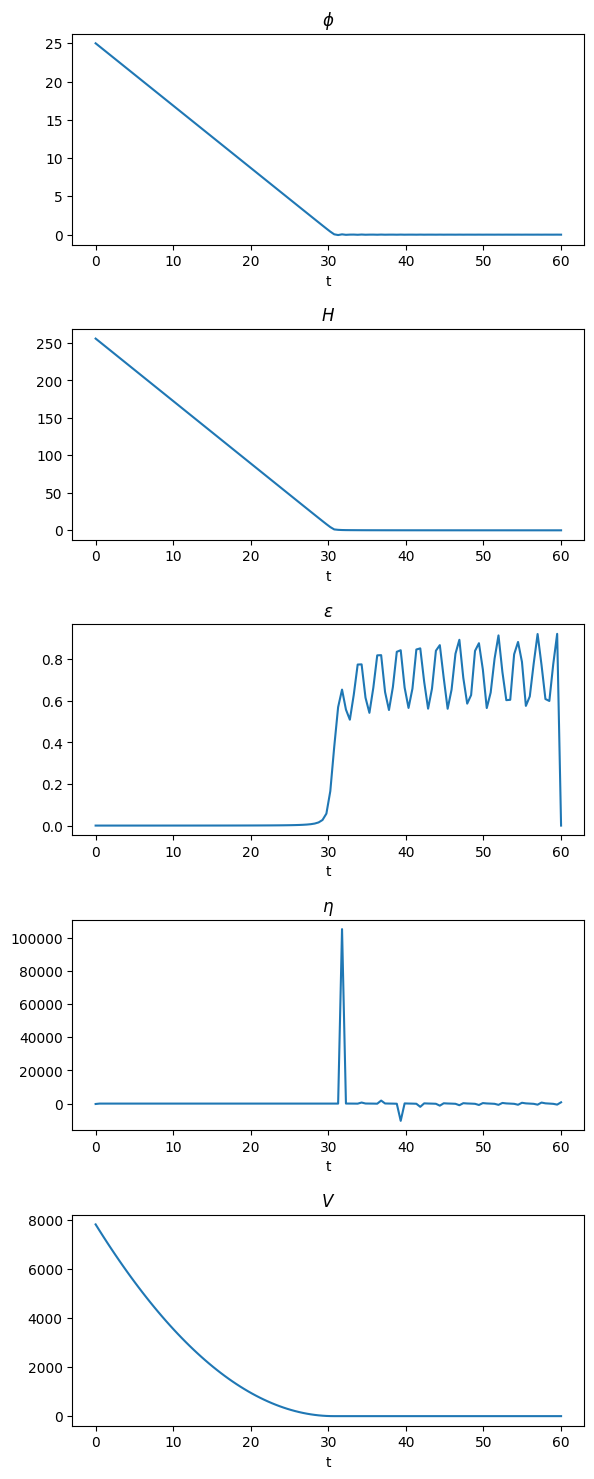

In [22]:
fig=plt.figure(figsize=(4,10),dpi=100)
fig,axs = plt.subplots(5,1,sharex=False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=3,
                    wspace=0.4,
                    hspace=0.4)
axs[0].plot(sol.t,phi)
axs[0].set_title('$\phi$')
axs[0].set_xlabel('t')
axs[1].plot(sol.t, H(phi,dphi_dt))
axs[1].set_title('$H$')
axs[1].set_xlabel('t')
axs[2].plot(sol.t, Epsilon)
axs[2].set_title('$\epsilon$')
axs[2].set_xlabel('t')
axs[3].plot(sol.t, Eta)
axs[3].set_title('$\eta$')
axs[3].set_xlabel('t')
axs[4].plot(sol.t, V(phi))
axs[4].set_title('$V$')
axs[4].set_xlabel('t')


## More physical method: using N=ln(a) as independent variable (number of e-folds)



Note that the equations read

$\frac{d^2\phi}{dN^2}=-(\frac{1}{H}\frac{dH}{dN}+3)\frac{d\phi}{dN}-\frac{m^2\phi^2}{H^2}$

$H^2=\frac{\frac{8\pi G}{3} V(\phi)}{1-\frac{4\pi G}{3}(\frac{d\phi}{dN})^2}$

$\frac{dH}{dN}=-H-\frac{8\pi G}{3} [H(\frac{d\phi}{dN})^2+\frac{V}{H}]$



1.  Note that without considering matter (inflaton only) H becomes zero when $V(\phi)=0$, which in our case happens when $\phi=0$. This is a problem since we are dividing by H in many places in our equations.
To avoid this problem, we add a small offset in the definition of $V(\phi)$ .

2.  Note that for $H$ to be positive definite it must be $1-\frac{4\pi G}{3}(\frac{d\phi}{dN})^2>0$ which gives an upper and lower bound for the derivative of the inflaton:

    $|\frac{d\phi}{dN}|<\sqrt{\frac{3}{4\pi G}}$

In [23]:
G=1               ##in this units M_Planck=8\pi \simeq 24
M=1

def V(phi):
  return 0.5*M**2*(phi**2)+0.00000001
  ####offset by hand in order to keep H different from zero (in the equation we divide by H):

##from Friedmann 1 we get H
def H(phi, dphi_dN):
    return np.sqrt( 8*np.pi/3*G*V(phi)/ (1-4*np.pi*G/3*dphi_dN**2))


##from Friedmann 2 we get dHdN
def dHdN(phi,dphi_dN):
  _H=H(phi,dphi_dN)
  return -H(phi,dphi_dN)-8*np.pi*G/3*( H(phi,dphi_dN)*dphi_dN**2-V(phi)/H(phi,dphi_dN) )

##from Field Eqn we get d2phidN2
##y[1] is dphidN
##y[0] is phi

def d2phidN2(t, y):
  phi, phi_p = y
  _H = H(phi, phi_p) ##var temporanea
  out= np.array([ y[1],  -(1/_H*dHdN(phi,phi_p)+3)*phi_p-((M/_H)**2)*phi ])
  return out


def eps(H):
    dH_dt=np.diff(H,1,append=H[H.size-1])
    return -dH_dt/H**2

def eta(phi_dot,phi_dotdot,H):
    return -phi_dotdot/(H*phi_dot)


In [24]:
# initial conditions
M=1
phi0 =  24                      ##almost 1 Planck mass.
dphi0_dt = 0

y0 = np.array([phi0, dphi0_dt])
start_time = 0.
stop_time = 100
Nsteps=1000

##indep variable
time = np.linspace(start_time, stop_time, Nsteps)
# numerical integrator
sol2 = solve_ivp(d2phidN2, [start_time, stop_time], y0, method='RK45', t_eval=time)
phi=sol2.y[0,:]
dphi_dt=sol2.y[1,:]
d2phi_dt2=d2phidN2(sol2.t,np.array([phi,dphi_dt]))[1]
#H=H(phi,dphi_dt)
#V=V(phi)

#epsilon=eps(H)
#eta=eta(dphi_dt,d2phi_dt2,H)

<Figure size 500x1000 with 0 Axes>

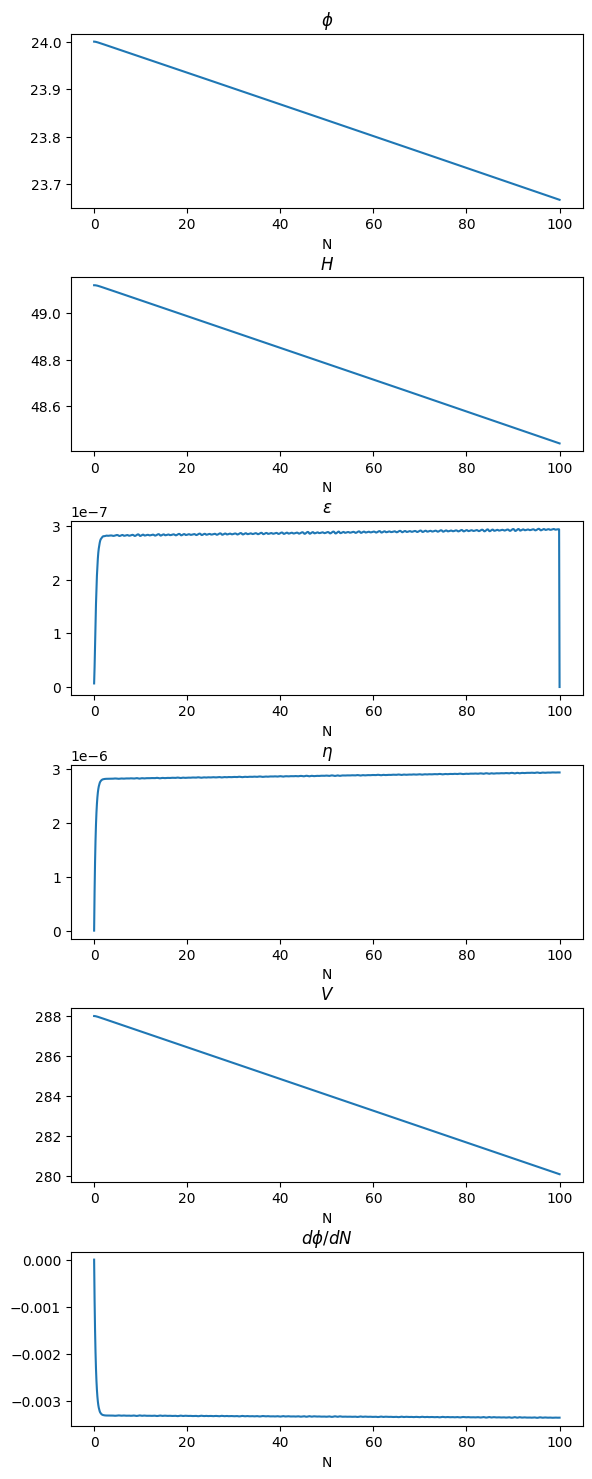

In [25]:
fig=plt.figure(figsize=(5,10),dpi=100)
fig,axs = plt.subplots(6,1,sharex=False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=3,
                    wspace=0.4,
                    hspace=0.4)
axs[0].plot(sol2.t,phi)
axs[0].set_title('$\phi$')
axs[0].set_xlabel('N')
axs[1].plot(sol2.t, H(phi,dphi_dt))
axs[1].set_title('$H$')

axs[1].set_xlabel('N')
axs[2].plot(sol2.t, eps(H(phi,dphi_dt)))
axs[2].set_title('$\epsilon$')
axs[2].set_xlabel('N')
axs[3].plot(sol2.t, eta(phi,dphi_dt,H(phi,dphi_dt)))
axs[3].set_title('$\eta$')
axs[3].set_xlabel('N')
axs[4].plot(sol2.t, V(phi))
axs[4].set_title('$V$')
axs[4].set_xlabel('N')
axs[5].plot(sol2.t,dphi_dt)
axs[5].set_title('$d\phi/dN$')
axs[5].set_xlabel('N')

The initial jump of eta and epsilon depends on the initial regime of the field: the inflaton descends rapidly in the potential and then rapidly becomes *Hubble dragged*, like a ball in a viscous fluid.

Note that fixing $M=M_P$ gives a very long slow-roll inflation in terms of e-folds.